In [1]:
from tkinter import *
from PIL import Image,ImageTk
from tkinter import filedialog
import pydicom
import matplotlib.pyplot as plt
import easygui
import numpy as np
import cv2
from skimage.filters.rank import gradient
from skimage.morphology import disk, erosion, diamond, opening, white_tophat, skeletonize
from skimage.filters import threshold_otsu,threshold_minimum
import os

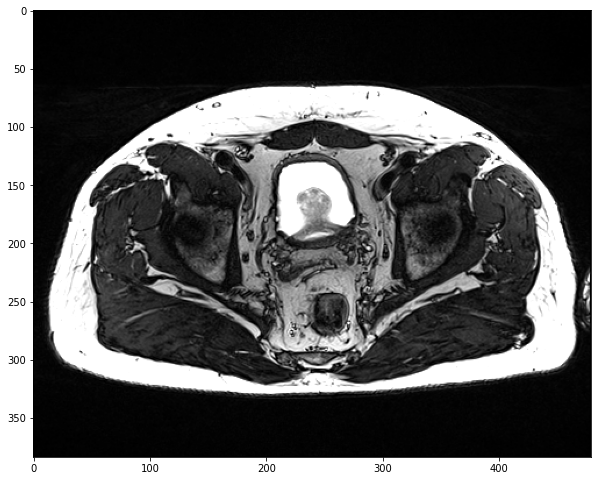

In [2]:
filepath = "../PROSTATA_1.MR.0002.0013.2021.12.22.13.14.21.169473.39486806.IMA"
full_dicom = pydicom.dcmread(filepath)
img = full_dicom.pixel_array
#npimg = np.zeros((img.shape[0],img.shape[1]))
#npimg = img

alpha = 0.5
beta = 0
img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
fig = plt.figure(figsize=(10,10))
plt.imshow(img,cmap="gray")

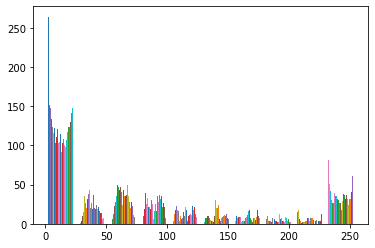

In [94]:
plt.hist(img)
plt.show()

In [3]:
print(full_dicom)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.43.166050.30010021122216083096600000047
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VE11C'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'OUT_PHASE', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20210922'
(0008, 0013) Instance Creation Time              TM: '114838.212000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0

In [ ]:
#img = img.astype(int)
#out = gradient(out, disk(1))

#thresh = img.mean()
thresh = threshold_otsu(img)
tresh2 = threshold_minimum(img)
out2 = img > tresh2
out = img > thresh

out = erosion(out, disk(1))
out = opening(out, disk(3))
#out2 = erosion(out2, disk(1))
out2 = opening(out2, disk(3))

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(2,2,2)
plt.imshow(out,cmap="gray")
plt.subplot(2,2,3)
plt.imshow(out2,cmap="gray")
plt.subplot(2,2,4)
plt.imshow(out*img ,cmap="gray")


In [ ]:
np.size(out)

In [ ]:
print(np.sum(out),np.sum(out2))

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img,cmap="gray")
plt.imshow(out2,cmap="inferno",alpha=0.3)

In [ ]:
from skimage.filters import try_all_threshold


fig, ax = try_all_threshold(img, figsize=(10, 20), verbose=False)

----------------------------------


In [2]:
class secuencia:
    def __init__(self,name,UID):
        self.name = name
        self.UID = UID
        self.dcm_serie = []
        #self.img_serie = []
    def add_dcm(self,dcm):
        self.dcm_serie.append(dcm)
        #self.img_serie.append(self.dcm_serie[-1].pixel_array)
    

In [33]:
root = Tk()
filepath = filedialog.askdirectory()
#filepath = list(filepath)
secuencias = []
sec_uids = []
for file in os.listdir(filepath):
    name, ext = os.path.splitext(file)
    if ext == ".IMA":
        temp_dcm = pydicom.dcmread(filepath+"/"+file)
        temp_uid = temp_dcm.SeriesInstanceUID
        if  temp_uid not in sec_uids:
            secuencias.append(secuencia(temp_dcm.SequenceName+"-> TE: "+str(temp_dcm.EchoTime)+", TR: "+str(temp_dcm.RepetitionTime)+", "+str(temp_dcm.ScanOptions) ,temp_uid))
            secuencias[-1].add_dcm(temp_dcm)
            sec_uids.append(temp_uid)
        else:
            for sec in secuencias:
                if temp_uid == sec.UID:
                    sec.add_dcm(temp_dcm)
root.mainloop()



In [13]:
print(secuencias[2].dcm_serie[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.43.166050.30010022042117450697700000121
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VE11C'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20220412'
(0008, 0013) Instance Creation Time              TM: '131135.465000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SO

In [12]:
print(secuencias[1].dcm_serie[1])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.43.166050.30010022042117450697700000047
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VE11C'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20220412'
(0008, 0013) Instance Creation Time              TM: '130839.341000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SO

In [34]:
for dcm in secuencias[1].dcm_serie:
    print([round(n) for n in dcm.ImageOrientationPatient])

[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0]


In [26]:
for sec in secuencias:
    for dcm in sec.dcm_serie:
        print(sec.name,dcm.pixel_array.shape)
    

*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (320, 360)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*h2d1_252-> TE: 89, TR: 1200, PFP (360, 320)
*tseR2d1_20-> TE: 99, TR: 4060, ['PFP', 'SAT2'] (384, 480)
*tseR2d1_20-> TE: 99, TR: 4060, ['PFP', 'SAT2'] (384, 480)
*tseR2d1_20-> TE: 99, TR: 4

In [35]:
a = [0,0,0]

In [36]:
a.conca[1,0,0]

In [37]:
a

[0, 0, 0, 1, 0, 0]